#### Importação de bibliotecas

In [1]:
# import pandas as pd
import cv2
import matplotlib.pyplot as plt

#### Função para exibir imagem

In [2]:
def display_image(image, text='Imagem'):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(text)
    plt.axis('off')
    plt.show()

#### Leitura da imagem

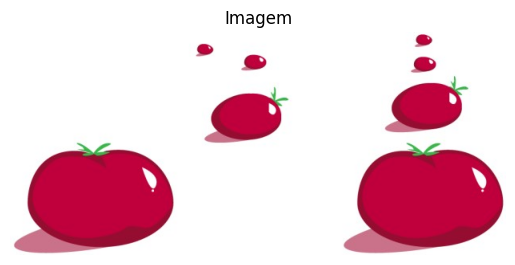

In [3]:
img = cv2.imread('./img/Tomates.jpg')
display_image(img)

#### Transformar em cinza

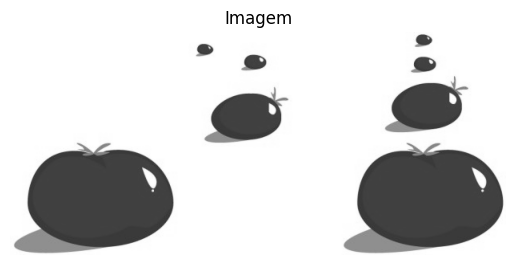

In [4]:
img_cinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
display_image(img_cinza)

#### Aplicação do Blur para remover o ruído e auxiliar a identificação das bordas;

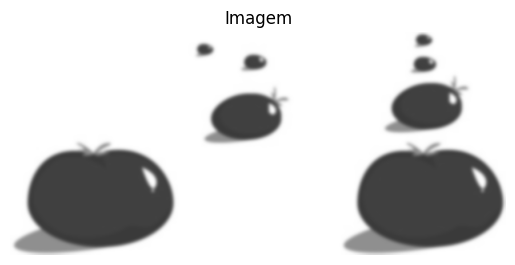

In [5]:
img_blur = cv2.GaussianBlur(img_cinza, (11, 11), 0)
display_image(img_blur)

#### Binarização da imagem para que se tenha apenas pixels pretos e brancos;

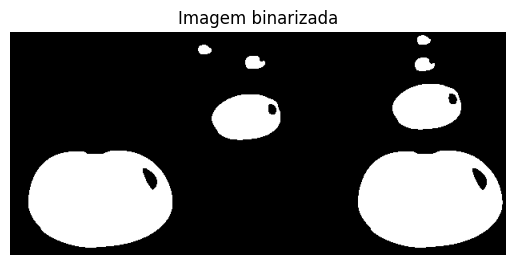

In [6]:
_, img_binary = cv2.threshold(img_blur, 127, 255, cv2.THRESH_BINARY_INV)
display_image(img_binary, 'Imagem binarizada')

#### Utilizar o detector de bordas para identificar os objetos

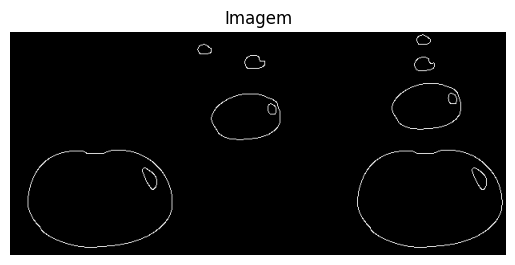

In [7]:
bordas = cv2.Canny(img_binary, 70, 120)
display_image(bordas)

#### Bordas identificadas, agora Desenhar e conatmos os contornos

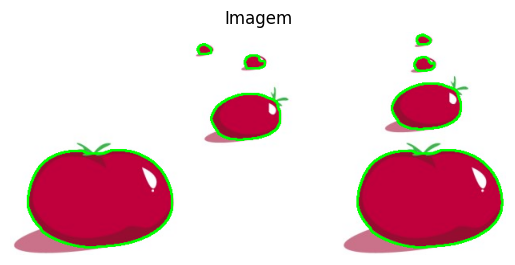

In [8]:
contornos, hierarquia = cv2.findContours(bordas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contornos, -1, (0, 255, 0), 2)


display_image(img)
# display_image(img_cinza)
# display_image(img_blur)
# display_image(bordas)

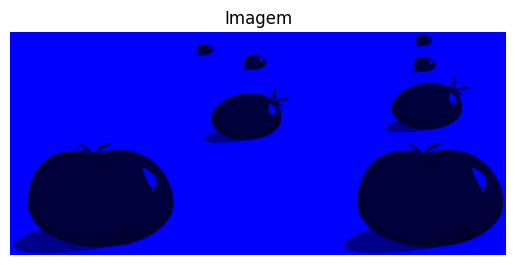

In [13]:
import numpy as np
import cv2

imagem = cv2.imread('./img/Tomates.jpg')
(b, g, r) = cv2.split(imagem)
zeros = np.zeros(imagem.shape[:2], dtype = 'uint8')

display_image(cv2.merge([b, zeros, zeros]))
# display_image(cv2.merge([zeros, g, zeros]))
# display_image(cv2.merge([zeros, zeros, r]))
# display_image(cv2.merge([zeros, g, r]))

# cv2.imshow("Vermelho", cv2.merge([b, zeros, zeros]))

# cv2.waitKey(27)

#### Processo de OCR (Optical Character Recognition) converte uma imagem de texto em um formato legível por máquina
##### Converte uma imagem em texto

In [ ]:
import pytesseract
from PIL import Image
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
import spacy

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Carregar modelo de linguagem do SpaCy
nlp = spacy.load('pt_core_news_sm')

# Baixar as stopwords do NLTK
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Função para realizar OCR em uma imagem
def perform_ocr(image_path):
    # Abrir a imagem
    image = Image.open(image_path)
    # Realizar OCR usando Tesseract
    text = pytesseract.image_to_string(image, lang='por')
    return text

# Função para realizar a sumarização de texto
def perform_summarization(text):
    # Tokenize o texto em frases, divide o texto em frases usando a função sent_tokenize da biblioteca NLTK, considerando o idioma ingles padrao.
    sentences = sent_tokenize(text)
    # Tokenize as palavras, divide o texto em palavras usando a função word_tokenize da biblioteca NLTK.
    words = word_tokenize(text)
    # Remova stopwords, remove as palavras irrelevantes (stop words) do texto.
    stop_words = set(stopwords.words("portuguese"))
    words = [word for word in words if word.lower() not in stop_words]
    # Calcule a frequência das palavras, calcula a frequência das palavras no texto usando a classe FreqDist da biblioteca NLTK.
    freq_dist = FreqDist(words)
    # Calcule a frequência máxima, calcula a frequência máxima entre todas as palavras no texto.
    max_freq = max(freq_dist.values())
    # Normalizar as frequências, normaliza as frequências das palavras dividindo a frequência de cada palavra pela frequência máxima.
    for word in freq_dist.keys():
        freq_dist[word] = (freq_dist[word]/max_freq)
    # Calcule a pontuação das frases
    sentence_scores = {}
    for sentence in sentences:
        #Divide a frase em palavras, converte para minúsculas
        for word in word_tokenize(sentence.lower(), language='portuguese'):  
            #Verifica se a palavra está presente nas palavras relevantes (que não são stop words).
            if word in freq_dist.keys():
                #Verifica se a frase tem menos de 30 palavras.
                if len(sentence.split(' ')) < 30: 
                    #Verifica se a frase não está presente no dicionário de pontuações das frases.
                    if sentence not in sentence_scores.keys(): 
                        #Atribui a pontuação da palavra à frase no dicionário de pontuações das frases.
                        sentence_scores[sentence] = freq_dist[word] 
                    #Se a frase já estiver presente no dicionário de pontuações das frases.
                    else:
                        #Incrementa a pontuação da frase com a pontuação da palavra.
                        sentence_scores[sentence] += freq_dist[word] 
    # Obtenha as frases mais importantes
    #Ordena as frases com base em suas pontuações, do maior para o menor, e seleciona as três primeiras frases.
    summarized_sentences = sorted(sentence_scores, key=sentence_scores.get, reverse=True)[:3]
    #Une as frases selecionadas em um único resumo, separadas por espaço.
    summary = ' '.join(summarized_sentences) 
    return summary

# Caminho da imagem
image_path = "texto.png"

# Realizar OCR
print("Performing OCR...")
ocr_text = perform_ocr(image_path)
print("OCR Result:")
print(ocr_text)
print()

# Realizar sumarização
print("Performing Summarization...")
summary_text = perform_summarization(ocr_text)
print("Summary:")
print(summary_text)
print()
